In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('salaries.csv')

In [10]:
target = df['salary_more_then_100k']   
inputs = df.drop('salary_more_then_100k', axis='columns')

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

In [11]:
inputs['company_n'] = le_company.fit_transform(inputs['company'])
inputs['job_n'] = le_job.fit_transform(inputs['job'])
inputs['degree_n'] = le_degree.fit_transform(inputs['degree'])

In [ ]:
inputs

In [13]:
inputs = inputs.drop(['company', 'job', 'degree'], axis='columns')

In [14]:
inputs

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train, x_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2)

In [17]:
from sklearn import tree

In [18]:
model = tree.DecisionTreeClassifier()

In [19]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [20]:
y_predicted = model.predict(x_test)

In [24]:
y_predicted

array([1, 0, 1, 1], dtype=int64)

In [25]:
y_test

8     0
0     0
15    1
13    1
Name: salary_more_then_100k, dtype: int64

In [26]:
model.score(x_test, y_test)

0.75

In [ ]:
x_train, y_train

In [ ]:
model.predict([[1, 2, 0]])[0]

[Text(0.2857142857142857, 0.9166666666666666, 'x[1] <= 0.5\ngini = 0.444\nsamples = 12\nvalue = [4, 8]'),
 Text(0.14285714285714285, 0.75, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.21428571428571427, 0.8333333333333333, 'True  '),
 Text(0.42857142857142855, 0.75, 'x[0] <= 0.5\ngini = 0.5\nsamples = 8\nvalue = [4, 4]'),
 Text(0.3571428571428571, 0.8333333333333333, '  False'),
 Text(0.2857142857142857, 0.5833333333333334, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.5714285714285714, 0.5833333333333334, 'x[0] <= 1.5\ngini = 0.444\nsamples = 6\nvalue = [2, 4]'),
 Text(0.42857142857142855, 0.4166666666666667, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.7142857142857143, 0.4166666666666667, 'x[1] <= 1.5\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.5714285714285714, 0.25, 'x[2] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.42857142857142855, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.7142857142857143, 0.08333333333

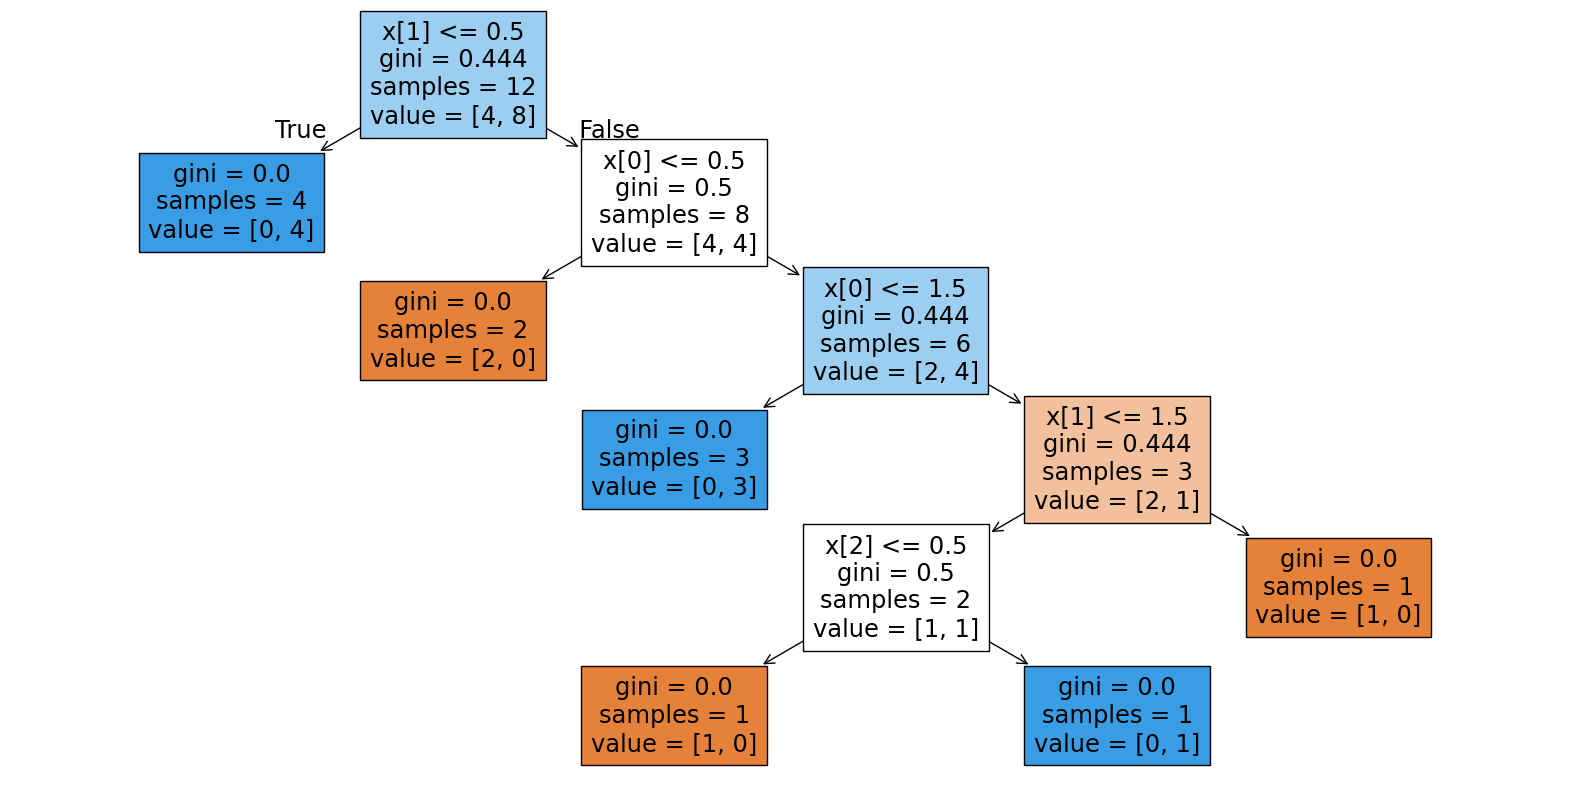

In [42]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
tree.plot_tree(model,filled=True)